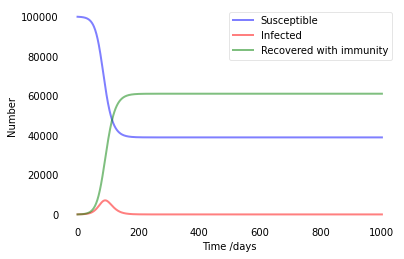

267
0.610439253785375 0.38955084941282303


In [41]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Total population, N.
N = 100000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 30, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.220558, 1./7
# A grid of time points (in days)
t = np.linspace(0, 1000, 1000)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

for i in range(600):
  if(I[i]<1):
    print(i)
    break;

#to find the days needed for infection to die out

print(R[i]/N, S[i]/N)

#to assess the ratio of recovered and uninfected people remaining

#On rerunning code with various values of N initial, in order to observe population scaling down characteristics
#we observe that ratio remains unaffected (astonishing!)
#to maintain the timelines integrity, we can reduce population to 100,000 provided we scale the time axis by 2